# Analysing and plotting borehole data

We present here how to calculate fracture density and the openness along a borehole.
<br> Visualisation functions (like tadpoles, density, lithologies) are also introduced.

### Python imports

In [1]:
import sys, os, math, numpy as np
import pandas as pd
import matplotlib.pyplot as plt


path=r'python_functions'
sys.path.append(path)
import utils_borehole as uB

In [2]:
#ignore python warnings in the notebook
import warnings
warnings.filterwarnings('ignore')

### 1) Import fracture dataset in a Panda Dataframe

In [3]:
input_folder = r'input_data'
filename = 'p_frac_core_select'
all_data = pd.read_csv(os.path.join(input_folder,filename+str('.txt')), sep = ';')

### 2) Select data from one borehole

In [4]:
borehole_name = 'KFM01A'

b_data = all_data.loc[all_data['IDCODE']==borehole_name]
b_data = b_data.sort_values(by = ['ADJUSTEDSECUP(m)']) #we make sure that the adjusted secup is in the right order

### 3) Construct borehole analyser

In [5]:
b_analysis = uB.BoreholeAnalysis(b_data)

### 4) Some borehole information

In [6]:
print('p10 = ' + str(b_analysis.p10))
print('p32 = ' + str(b_analysis.p32))
print('length = ' + str(b_analysis.b_length))
print('open fraction = ' + str(b_analysis.fop)) #p32_open/p32

p10 = 1.7027896790965449
p32 = 4.3938031509402435
length = 890.891
open fraction = 0.3979368373110317


### 5) Calculate density along borehole

Two methods can be used to compute densities: 
1) the 'classic' method, corresponding to a classic sampling of the borehole, with bins of a given size. It returns a set of discret measurement (one value of density per bin)
2) the 'smoothed' method, which convolute gaussians to the fracture positions. The sampling size corresponds to the "width" of the gaussian (~std x 2). It returns a continuous measurement.

An angle correction is applied to the fractures (Terzaghi), to avoid undersampling due to fracture orientation relative to the borehole.

First, we calculate for all data:

In [7]:
sampling_size = 10

#classic method
densities_c = b_analysis.compute_density_along_borehole('classic', sampling_size) 
#smoothed method
densities_s = b_analysis.compute_density_along_borehole('smoothed', sampling_size) 

The function return a dataframe as follow :

In [8]:
print(densities_c)

    p10        p32           x           z
0   3.0   7.539165  107.884900 -104.234667
1   4.6  10.793768  117.686500 -113.984348
2   4.0  11.965289  126.504875 -122.753750
3   3.1   8.259134  137.752484 -133.935161
4   3.9  11.510961  147.557590 -143.680769
..  ...        ...         ...         ...
84  0.0   0.000000  947.599000         NaN
85  0.1   0.136070  955.507000 -937.820000
86  0.3   0.809070  971.260000 -953.056667
87  0.1   0.228937  979.112000 -960.650000
88  0.0   0.000000  987.599000         NaN

[89 rows x 4 columns]


Then for open fractures:

In [9]:
densities_c = b_analysis.compute_density_along_borehole('classic', sampling_size, frac_type = 'open')
densities_s = b_analysis.compute_density_along_borehole('smoothed', sampling_size, frac_type = 'open')

Finally, we compute the openness along the borehole :

In [10]:
# Openness (fop)
densities_c = b_analysis.compute_fop_along_borehole('classic')
densities_s = b_analysis.compute_fop_along_borehole('smoothed')

In [11]:
print(densities_c)

    p10        p32           x           z  p10_open  p32_open      x_open  \
0   3.0   7.539165  107.884900 -104.234667       2.3  4.602940  108.455609   
1   4.6  10.793768  117.686500 -113.984348       3.2  5.461020  117.306875   
2   4.0  11.965289  126.504875 -122.753750       2.6  5.613635  126.172269   
3   3.1   8.259134  137.752484 -133.935161       1.8  4.441279  138.439778   
4   3.9  11.510961  147.557590 -143.680769       3.3  9.727191  147.865212   
..  ...        ...         ...         ...       ...       ...         ...   
84  0.0   0.000000  947.599000         NaN       0.0  0.000000  947.599000   
85  0.1   0.136070  955.507000 -937.820000       0.1  0.136070  955.507000   
86  0.3   0.809070  971.260000 -953.056667       0.0  0.000000  967.599000   
87  0.1   0.228937  979.112000 -960.650000       0.0  0.000000  977.599000   
88  0.0   0.000000  987.599000         NaN       0.0  0.000000  987.599000   

        z_open       fop  
0  -104.802174  0.610537  
1  -113.6

### 5) Plots

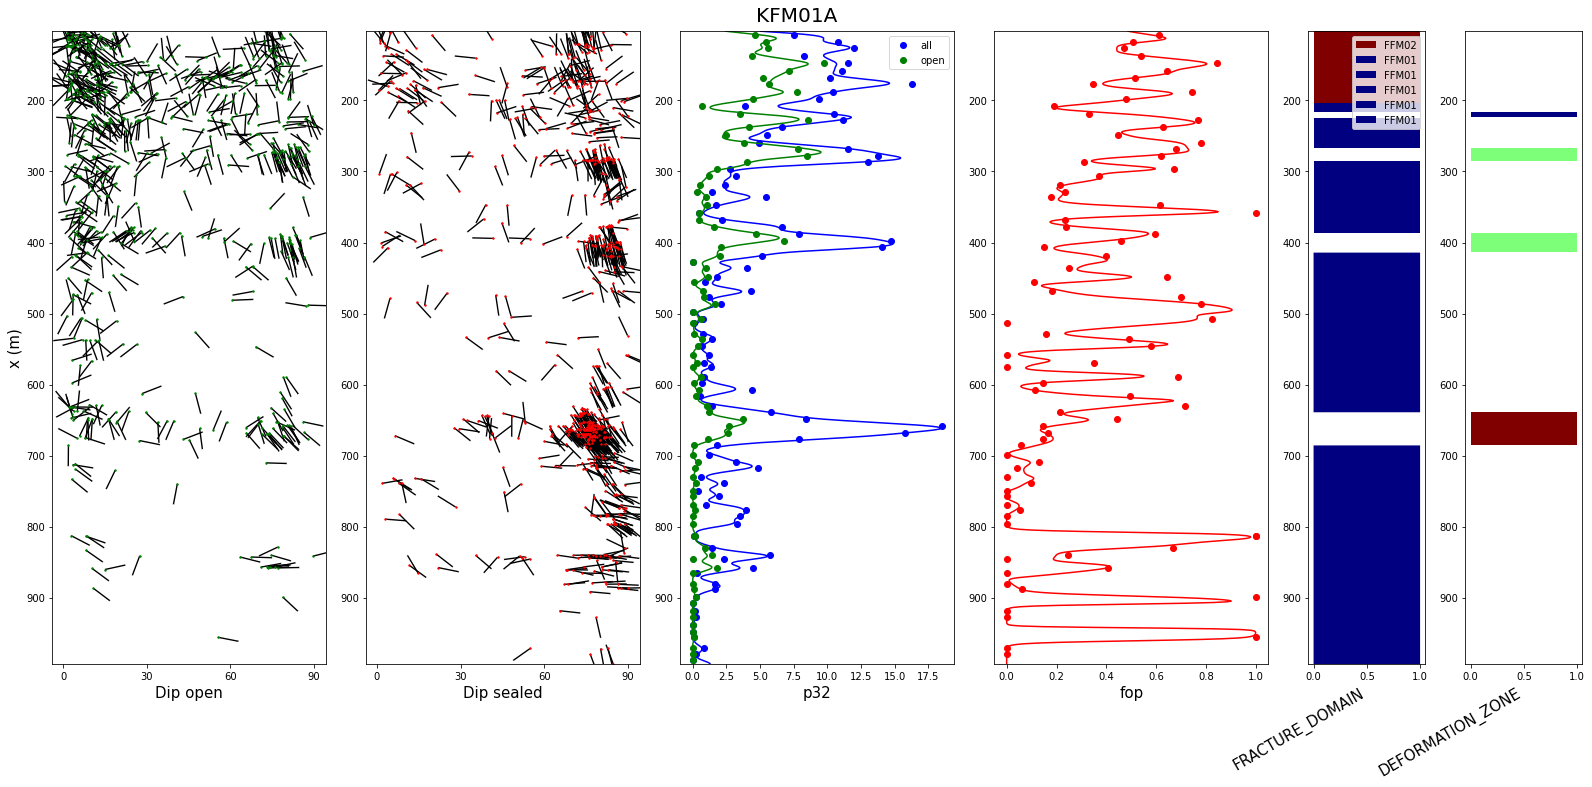

In [12]:
fig = plt.figure()
ax1 = plt.subplot2grid((1, 10), (0, 0), colspan = 2)
ax1.set_ylabel('x (m)', fontsize = 15)
ax2 = plt.subplot2grid((1, 10), (0, 2), colspan = 2)
ax3 = plt.subplot2grid((1, 10), (0, 4), colspan = 2)
ax4 = plt.subplot2grid((1, 10), (0, 6), colspan = 2)
ax5 = plt.subplot2grid((1, 10), (0, 8), colspan = 1)
ax6 = plt.subplot2grid((1, 10), (0, 9), colspan = 1)

# tadpoles
b_analysis.plot_tadpole(ax1, 'open')
b_analysis.plot_tadpole(ax2, 'sealed')
# density and fop
b_analysis.plot(ax3,densities_c['p32'], densities_c['x'], 'bo', label = 'all', xlabel = 'p32')
b_analysis.plot(ax3,densities_s['p32'], densities_s['x'], 'b-')
b_analysis.plot(ax3,densities_c['p32_open'], densities_c['x'], 'go', label = 'open')
b_analysis.plot(ax3,densities_s['p32_open'], densities_s['x'], 'g-')
b_analysis.plot(ax4,densities_c['fop'], densities_c['x'], 'ro', xlabel = 'fop')
b_analysis.plot(ax4,densities_s['fop'], densities_s['x'], 'r-')
# fracture domains and deformation zones
b_analysis.plot_lithology(ax5, 'FRACTURE_DOMAIN', legend = True)
b_analysis.plot_lithology(ax6, 'DEFORMATION_ZONE')
#b_analysis.plot_lithology(ax6, 'BEST_ROCK_CODE(code)', legend = True)

fig.suptitle(borehole_name, fontsize = 20)
fig.set_tight_layout(True)
fig.set_size_inches(1600./fig.dpi,800./fig.dpi)

plt.show()

### 6) Compute densities by selecting FFM01

It is possible to analyse some parts of the borehole, selected by Fracture Domains or Deformation Zones. Here for example, we select the fracture domain FFM01.

In [13]:
# We use the smooting method, more convenient for small sections
sampling_size = 20

densities_analysis_FFM01 = b_analysis.compute_density_along_borehole('smoothed', sampling_size, lithology_type = 'FRACTURE_DOMAIN', lithology_name = 'FFM01')
densities_analysis_FFM01 = b_analysis.compute_density_along_borehole('smoothed', sampling_size, frac_type = 'open', lithology_type = 'FRACTURE_DOMAIN', lithology_name = 'FFM01')
densities_analysis_FFM01 = b_analysis.compute_fop_along_borehole('smoothed')

densities_analysis_FFM01 = b_analysis.compute_density_along_borehole('classic', sampling_size, lithology_type = 'FRACTURE_DOMAIN', lithology_name = 'FFM01')
densities_analysis_FFM01 = b_analysis.compute_density_along_borehole('classic', sampling_size, frac_type = 'open', lithology_type = 'FRACTURE_DOMAIN', lithology_name = 'FFM01')
densities_analysis_FFM01 = b_analysis.compute_fop_along_borehole('classic')

ok
ok


Plots : 

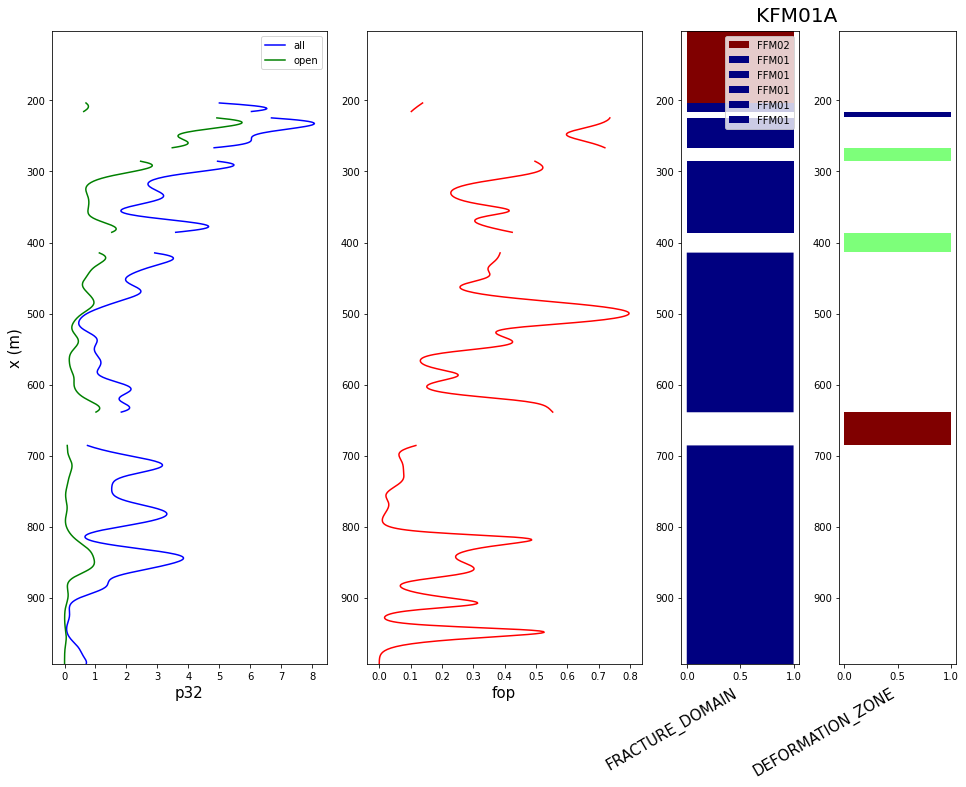

In [14]:
fig = plt.figure()
ax1 = plt.subplot2grid((1, 10), (0, 0), colspan = 2)
ax1.set_ylabel('x (m)', fontsize = 15)
ax2 = plt.subplot2grid((1, 10), (0, 2), colspan = 2)
ax3 = plt.subplot2grid((1, 10), (0, 4), colspan = 1)
ax4 = plt.subplot2grid((1, 10), (0, 5), colspan = 1)

# density and fop
b_analysis.plot(ax1,densities_analysis_FFM01['p32'], densities_analysis_FFM01['x'], 'b-', label = 'all', xlabel = 'p32')
b_analysis.plot(ax1,densities_analysis_FFM01['p32_open'], densities_analysis_FFM01['x'], 'g-', label = 'open')
b_analysis.plot(ax2,densities_analysis_FFM01['fop'], densities_analysis_FFM01['x'], 'r-', xlabel = 'fop')
# fracture domains and deformation zones
b_analysis.plot_lithology(ax3, 'FRACTURE_DOMAIN', legend = True)
b_analysis.plot_lithology(ax4, 'DEFORMATION_ZONE')
#b_analysis.plot_lithology(ax6, 'BEST_ROCK_CODE(code)', legend = True)

fig.suptitle(borehole_name, fontsize = 20)
fig.set_tight_layout(True)
fig.set_size_inches(1600./fig.dpi,800./fig.dpi)

plt.show()